Importing data and pre-processing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("vaccination_all_tweets.csv")

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df_india = df['user_location'].tolist()


In [5]:
type(df_india)

list

In [6]:
st = "India"

In [7]:
df_india_unique = set()
for i in df_india:
    if isinstance(i,str) and st in i:
        df_india_unique.add(i)

In [8]:
df_main = df[df["user_location"].isin(df_india_unique)]

In [9]:
df_main.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False
23,1337773751841144833,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,2014-03-16 03:52:50,64185,1183,1794,True,2020-12-12 14:58:11,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False
51,1338631874814619653,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,2013-12-30 08:51:23,855,3046,8236,False,2020-12-14 23:48:04,I’ve never been so excited to get a vaccine 💉💉...,"['CovidVaccine', 'PfizerBioNTech', 'VaccinesSa...",Twitter for iPhone,1,10,False
75,1338574693087936513,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14 20:00:51,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False
94,1338551175587786752,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16816,2448,20,False,2020-12-14 18:27:23,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0,0,False


In [10]:
df_main.shape

(44338, 16)

In [11]:
df_main = df_main[df_main.source != "VaxBlr"] 

In [12]:
df_main = df_main.dropna()

In [14]:
df_main=df_main[['date','text']]

In [15]:
sentiment_data = df_main.query('date >="2021-01-16 00:00:00" and date <"2022-01-01 00:00:00"')

In [19]:
sentiment_data[::-1]

,date,text
228160,2021-11-16 06:09:44,One of the weird things about #SputnikV's Indi...
228097,2021-11-17 10:13:16,#SputnikV vaccine has demonstrated 96.3% effic...
227931,2021-11-21 09:24:52,Anyone facing sudden changes in body after few...
227879,2021-11-22 11:24:55,As Covishield and Covaxin push forward India's...
227827,2021-11-23 11:23:54,News For #SputnikV vaccine takers:\n\nRussian ...
...,...,...
3712,2021-01-17 10:52:42,29 Dead in Norway after Getting Vaccinated.\n\...
3586,2021-01-16 03:02:45,A global #CoronavirusVaccine rollout suffered ...
3577,2021-01-16 05:46:34,#horror #BreakingNews -\n\n23 people die in #N...
3576,2021-01-16 05:47:45,#Norway has launched a detailed investigation ...


Sentiment analysis

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import os
import string
import re


In [21]:
def clean_text(text):
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)

    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Removing hashtags
    text = re.sub(r'#[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    #The following regular expression are for removing apostrophes and expanding words
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    
    #Removing emojis
    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                "]+", flags=re.UNICODE)
    emoji_pattern.sub(r'', text)
    return text


In [22]:
main_data= sentiment_data["text"][0:].apply(clean_text)

In [23]:
main_data.shape

(19182,)

In [24]:
main_data = main_data.reset_index()

In [25]:
main_data.head()

,index,text
0,2947,If we do not witness the same thing in India t...
1,3576,has launched a detailed investigation after 2...
2,3577,23 people die in after receiving officials Do...
3,3586,A global rollout suffered a major blow Friday ...
4,3712,29 Dead in Norway after Getting Vaccinated. No...


In [26]:
main_date = main_data.drop(['index'],axis=1)

In [27]:
date_df=sentiment_data["date"][0:].tolist()

In [28]:
main_data["date"]=date_df

In [29]:
main_data.head()

,index,text,date
0,2947,If we do not witness the same thing in India t...,2021-01-17 06:11:07
1,3576,has launched a detailed investigation after 2...,2021-01-16 05:47:45
2,3577,23 people die in after receiving officials Do...,2021-01-16 05:46:34
3,3586,A global rollout suffered a major blow Friday ...,2021-01-16 03:02:45
4,3712,29 Dead in Norway after Getting Vaccinated. No...,2021-01-17 10:52:42


In [30]:
main_data = main_data.drop(["index"],axis=1)

In [31]:
main_data = main_data.dropna()

In [32]:
main_data[::-1]

,text,date
19181,One of the weird things about is India saga i...,2021-11-16 06:09:44
19180,vaccine has demonstrated 96.3 efficacy agains...,2021-11-17 10:13:16
19179,Anyone facing sudden changes in body after few...,2021-11-21 09:24:52
19178,As Covishield and Covaxin push forward India i...,2021-11-22 11:24:55
19177,News For vaccine takers Russian President Puti...,2021-11-23 11:23:54
...,...,...
4,29 Dead in Norway after Getting Vaccinated. No...,2021-01-17 10:52:42
3,A global rollout suffered a major blow Friday ...,2021-01-16 03:02:45
2,23 people die in after receiving officials Do...,2021-01-16 05:46:34
1,has launched a detailed investigation after 2...,2021-01-16 05:47:45


In [33]:
#LDA Model and Sentiment Analysis
sid_obj = SentimentIntensityAnalyzer() 
pos=[]
nev=[]
def preprocess_data(df):
    df["text"] = df["text"].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df['date'].dt.month
    return df

def sentiment(df):
    sentiment_scores = [] 
    for text in df['text']:
        scores = sid_obj.polarity_scores(text)
        sentiment_scores.append(scores['compound'])
    df['sentiment_score'] = sentiment_scores
df = preprocess_data(main_data)
sentiment(df)

In [56]:
df.head()

,text,date,month,sentiment_score
0,If we do not witness the same thing in India t...,2021-01-17 06:11:07,1,0.4404
1,has launched a detailed investigation after 2...,2021-01-16 05:47:45,1,-0.4767
2,23 people die in after receiving officials Do...,2021-01-16 05:46:34,1,-0.5994
3,A global rollout suffered a major blow Friday ...,2021-01-16 03:02:45,1,-0.6705
4,29 Dead in Norway after Getting Vaccinated Not...,2021-01-17 10:52:42,1,-0.6486


In [52]:
monthly_sentiment = df.groupby(df['date'].dt.month)['sentiment_score'].mean()

In [53]:
monthly_sentiment

date
1    -0.183403
2     0.072247
3     0.126935
4     0.117308
5     0.084511
6     0.097600
7     0.090579
8     0.141484
9     0.086110
10    0.180353
11    0.249281
Name: sentiment_score, dtype: float64

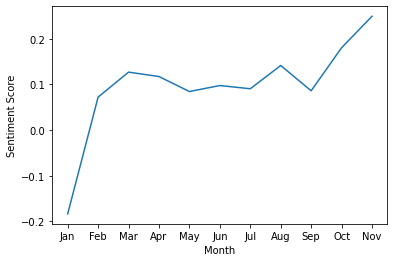

In [36]:
# Line plot
fig, ax = plt.subplots()
ax.plot(monthly_sentiment.index, monthly_sentiment.values)
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(range(1,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'])
plt.show()

<AxesSubplot:xlabel='month', ylabel='sentiment_score'>

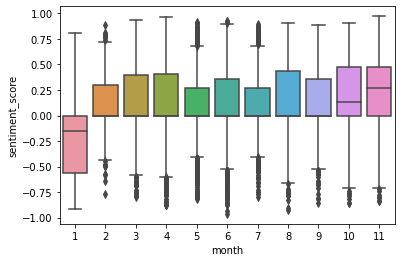

In [37]:
#Boxplot
sns.boxplot(x='month', y='sentiment_score', data=df)

In [38]:
data_counts = df.groupby('month').size().reset_index(name='counts')

In [43]:
data_counts

,month,counts
0,1,36
1,2,367
2,3,2130
3,4,2780
4,5,3115
5,6,4141
6,7,1131
7,8,1536
8,9,901
9,10,1515


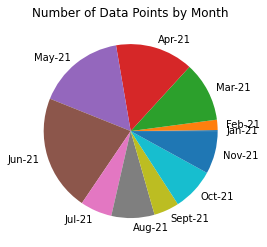

In [42]:
plt.pie(data_counts['counts'], labels=['Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sept-21', 'Oct-21', 'Nov-21'])
plt.title('Number of Data Points by Month')
plt.show()